Importing functions and defining the trajectory

In [2]:
from math import sin,cos,pi,log,exp
import matplotlib.pyplot as plt
import numpy as np
import cfeplib

In [3]:
f=open('redtraj-5-0.rmsd')
traj=[]
for l in f:
    l=l.split()
    traj.append(float(l[1]))
f.close()

Defining free diffusion

In [4]:
def f(x): return 0

def D(x): return 1

dt=0.001

In [5]:
ev1=[cos(x*pi) for x in traj]

In [6]:
ldt=[2**i for i in range(16)]
for dt in ldt:
    try: print (dt,cfeplib.comp_eval(ev1,dt)/.001) # divide by dt=0.001 of the diffusion trajectory timestep
    except: pass

1 478.0714541192393
2 304.66866354159646
4 191.16256440084817
8 118.92905794826477
16 75.1735574918109
32 48.343533277182004
64 31.935949215524733
128 22.466303105965817
256 15.687279430619924
512 9.860543507582284
1024 4.505750362740965
2048 2.6177842563613223
8192 0.6634063387287018
16384 0.31988050437840365
32768 0.2591275777900829


(-0.04, 0.05)

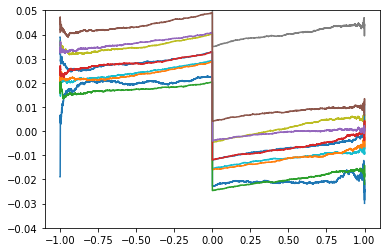

In [7]:
lx,ltheta=cfeplib.comp_theta(ev1,ldt,tinf=1,dx=0.0001)
%matplotlib inline
import matplotlib.pyplot as plt
for ly in ltheta:
    plt.plot(lx,ly)
plt.ylim((-0.04,0.05))

In [8]:
ev12=[cos(x*pi)+0.5*cos(x*5*pi) for x in traj]
for dt in ldt:
    try: print (dt,comp_eval(ev12,dt)/0.001)
    except: pass

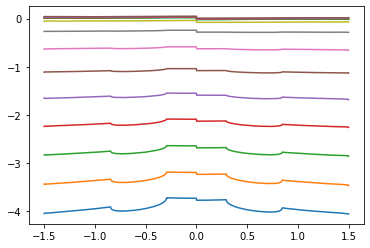

In [9]:
lx,ltheta=cfeplib.comp_theta(ev12,ldt,tinf=512,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)

In [10]:
def f(x): return -x

def D(x): return 1

dt=0.01

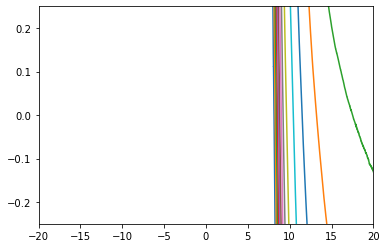

In [13]:
ev1=[x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev1,dt))
    except: pass

lx,ltheta=cfeplib.comp_theta(ev1,ldt,tinf=64,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-20,20)
_=plt.ylim(-0.25,0.25)

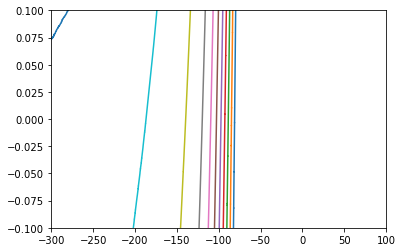

In [15]:
ev2=[1-x*x for x in traj]

for dt in ldt:
    try: print (dt,comp_eval(ev2,dt))
    except: pass

lx,ltheta=cfeplib.comp_theta(ev2,ldt,tinf=16,dx=0.001)
for ly in ltheta: plt.plot(lx,ly)
plt.xlim(-300,100)
_=plt.ylim(-0.1,0.1)